## Dependencias

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

## Lectura de datos

In [67]:
muestra_2006 = pd.read_csv(r'C:\Users\Jesús Camacho\Desktop\FES_semestres\2024-1\Muestreo\muestra_2006.csv')
estratos = pd.read_csv(r'C:\Users\Jesús Camacho\Desktop\FES_semestres\2024-1\Muestreo\estratos.csv')
mexico = gpd.read_file(r'C:\Users\Jesús Camacho\Desktop\FES_semestres\2024-1\Muestreo\shapes\01_32_mun.shp')

In [68]:
datos_elecciones = pd.merge(muestra_2006, estratos, on='estrato', how='left')

datos_elecciones['fh'] = datos_elecciones['Nh'] / datos_elecciones['nh']
datos_elecciones['fpc'] = datos_elecciones['nh'] / datos_elecciones['Nh']

datos_elecciones = datos_elecciones.sort_values(by=['estrato', 'casilla_id'])

## Estimación por estado

In [69]:
partidos = ['pri_pvem','pan', 'panal', 'prd_pt_conv', 'psd', 'otros']

estimacion_x_estado = pd.DataFrame()

for partido in partidos:
    columna_yh = f'yh_{partido}'
    estimacion_x_estado[columna_yh] = datos_elecciones.groupby('edo_id')['fh'].apply(lambda x: (x * datos_elecciones[partido]).sum())#.reset_index(drop=True)

estimacion_x_estado = estimacion_x_estado.reset_index()

## Partidos con más votos por entidad

In [70]:
estimacion_x_estado['maximo_partido'] = estimacion_x_estado[['yh_pri_pvem', 'yh_pan', 'yh_panal', 'yh_prd_pt_conv', 'yh_psd', 'yh_otros']].idxmax(axis=1).apply(lambda x: x.split('_')[1])
estimacion_x_estado.head()

,edo_id,yh_pri_pvem,yh_pan,yh_panal,yh_prd_pt_conv,yh_psd,yh_otros,maximo_partido
0,1,104444.040580,179885.658696,5654.933333,85549.689855,14769.525362,10969.389855,pan
1,2,206158.374998,436847.434234,14013.480636,227787.502826,34208.695486,29185.699945,pan
2,3,30442.000000,51663.666667,1398.888889,75358.444444,4688.000000,3931.888889,prd
3,4,78275.830769,98307.838462,10758.527692,100679.530769,6450.375385,10450.047692,prd
4,5,248518.014148,397748.603865,8777.473430,215061.076892,26134.064067,22651.369393,pan


## Mapa

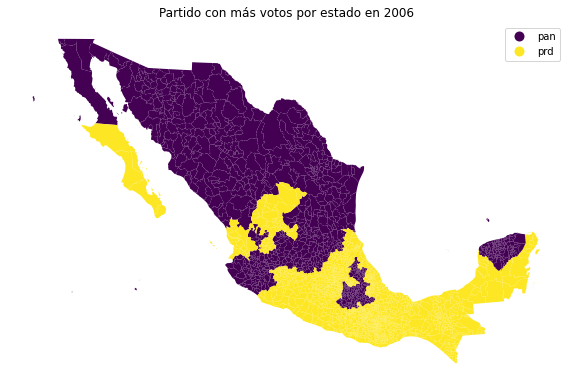

In [71]:
mapeo_edo_id_a_cve_ent = {
    1: '01', 2: '02', 3: '03', 4: '04', 5: '05', 6: '06', 7: '07', 8: '08',
    9: '09', 10: '10', 11: '11', 12: '12', 13: '13', 14: '14', 15: '15',
    16: '16', 17: '17', 18: '18', 19: '19', 20: '20', 21: '21', 22: '22',
    23: '23', 24: '24', 25: '25', 26: '26', 27: '27', 28: '28', 29: '29',
    30: '30', 31: '31', 32: '32'
}

estimacion_x_estado['edo_id'] = estimacion_x_estado['edo_id'].map(mapeo_edo_id_a_cve_ent)
mexico = mexico.merge(estimacion_x_estado, left_on='CVE_ENT', right_on='edo_id', how='left')
colores = {
    'pri_pvem': 'red',
    'pan': 'blue',  
    'panal': 'green',
    'prd_pt_conv': 'yellow', 
    'psd': 'orange',
    'otros': 'gray'
}
mexico['color'] = mexico['maximo_partido'].map(colores)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mexico.plot(column='maximo_partido', ax=ax, legend=True, legend_kwds={'loc': 'upper right'}, cmap='viridis')
plt.title('Partido con más votos por estado en 2006')
plt.axis('off')  
plt.show()